*Verified by Leila Belabbassi (to work with Pangeo), July 12, 2018*

In [1]:
import warnings
warnings.filterwarnings("ignore")

import requests
import time
import re
import xarray as xr
import pandas as pd
import os
import matplotlib.pyplot as plt 

In [2]:
# url = data['allURLs'][0]
url = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/wingardc@oregonstate.edu/20180620T123506-CE02SHSM-RID26-08-SPKIRB000-telemetered-spkir_abj_dcl_instrument/catalog.html'
tds_url = 'https://opendap.oceanobservatories.org/thredds/dodsC'
datasets = requests.get(url).text
urls = re.findall(r'href=[\'"]?([^\'" >]+)', datasets)
x = re.findall(r'(ooi/.*?.nc)', datasets)
for i in x:
    if i.endswith('.nc') == False:
        x.remove(i)
for i in x:
    try:
        float(i[-4])
    except:
        x.remove(i)
datasets = [os.path.join(tds_url, i) for i in x]
datasets

['https://opendap.oceanobservatories.org/thredds/dodsC/ooi/wingardc@oregonstate.edu/20180620T123506-CE02SHSM-RID26-08-SPKIRB000-telemetered-spkir_abj_dcl_instrument/deployment0003_CE02SHSM-RID26-08-SPKIRB000-telemetered-spkir_abj_dcl_instrument_20160601T000014.302000-20160630T234801.083000.nc']

In [3]:
ds = xr.open_mfdataset(datasets)
ds = ds.swap_dims({'obs': 'time'})
ds = ds.chunk({'time': 100})
ds

<xarray.Dataset>
Dimensions:                            (spectra: 7, time: 484433)
Coordinates:
    obs                                (time) int32 dask.array<shape=(484433,), chunksize=(100,)>
  * time                               (time) datetime64[ns] 2016-06-01T00:00:14.302000128 ...
    lat                                (time) float64 dask.array<shape=(484433,), chunksize=(100,)>
    lon                                (time) float64 dask.array<shape=(484433,), chunksize=(100,)>
Dimensions without coordinates: spectra
Data variables:
    deployment                         (time) int32 dask.array<shape=(484433,), chunksize=(100,)>
    id                                 (time) |S64 dask.array<shape=(484433,), chunksize=(100,)>
    channel_array                      (time, spectra) float64 dask.array<shape=(484433, 7), chunksize=(100, 7)>
    dcl_controller_timestamp           (time) object dask.array<shape=(484433,), chunksize=(100,)>
    driver_timestamp                   (time) da

In [4]:
ds['channel_array']

<xarray.DataArray 'channel_array' (time: 484433, spectra: 7)>
dask.array<shape=(484433, 7), dtype=float64, chunksize=(100, 7)>
Coordinates:
    obs      (time) int32 dask.array<shape=(484433,), chunksize=(100,)>
  * time     (time) datetime64[ns] 2016-06-01T00:00:14.302000128 ...
    lat      (time) float64 dask.array<shape=(484433,), chunksize=(100,)>
    lon      (time) float64 dask.array<shape=(484433,), chunksize=(100,)>
Dimensions without coordinates: spectra
Attributes:
    comment:                  This data product is the Downwelling Spectral I...
    long_name:                Downwelling Spectral Irradiance Measurement
    precision:                0
    data_product_identifier:  SPECTIR_L0
    units:                    counts
    _ChunkSizes:              [10000     7]

In [5]:
ds['channel_array'].values[0:10]

array([[2.15727290e+09, 2.16020870e+09, 2.17410790e+09, 2.17836454e+09,
        2.18792141e+09, 2.15392851e+09, 2.14862989e+09],
       [2.15952582e+09, 2.16333184e+09, 2.17935994e+09, 2.18415066e+09,
        2.19424813e+09, 2.15557491e+09, 2.14903219e+09],
       [2.15978714e+09, 2.16370118e+09, 2.17924640e+09, 2.18383430e+09,
        2.19345894e+09, 2.15589882e+09, 2.14919046e+09],
       [2.15880442e+09, 2.16238400e+09, 2.17785728e+09, 2.18262982e+09,
        2.19284992e+09, 2.15522406e+09, 2.14893747e+09],
       [2.15939712e+09, 2.16334816e+09, 2.17991456e+09, 2.18501843e+09,
        2.19600710e+09, 2.15580627e+09, 2.14902733e+09],
       [2.15919584e+09, 2.16301651e+09, 2.17876339e+09, 2.18348934e+09,
        2.19346918e+09, 2.15552090e+09, 2.14902349e+09],
       [2.15809344e+09, 2.16123866e+09, 2.17533011e+09, 2.17970835e+09,
        2.18878054e+09, 2.15449722e+09, 2.14881555e+09],
       [2.15889696e+09, 2.16251418e+09, 2.17805702e+09, 2.18276390e+09,
        2.19283578e+09, 2

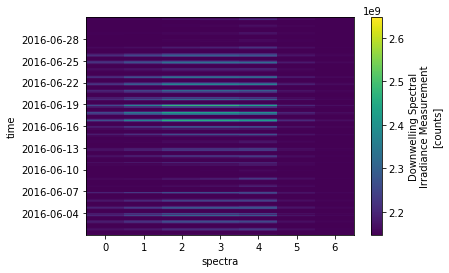

In [6]:
ds['channel_array'].plot()

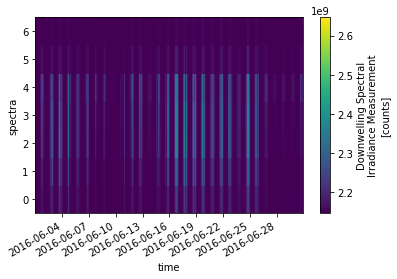

In [7]:
ds['channel_array'].T.plot()

In [8]:
ds['spkir_abj_cspp_downwelling_vector']

<xarray.DataArray 'spkir_abj_cspp_downwelling_vector' (time: 484433, spectra: 7)>
dask.array<shape=(484433, 7), dtype=float64, chunksize=(100, 7)>
Coordinates:
    obs      (time) int32 dask.array<shape=(484433,), chunksize=(100,)>
  * time     (time) datetime64[ns] 2016-06-01T00:00:14.302000128 ...
    lat      (time) float64 dask.array<shape=(484433,), chunksize=(100,)>
    lon      (time) float64 dask.array<shape=(484433,), chunksize=(100,)>
Dimensions without coordinates: spectra
Attributes:
    comment:                  Downwelling Spectral Irradiance is the measure ...
    long_name:                Downwelling Spectral Irradiance
    precision:                4
    data_product_identifier:  SPECTIR_L1
    units:                    µW cm-2 nm-1
    ancillary_variables:      channel_array
    _ChunkSizes:              [10000     7]

In [9]:
ds['spkir_abj_cspp_downwelling_vector'].values[0:10]

array([[ 2.6233868 ,  3.67699731,  7.62734449,  8.98782357, 12.14712515,
         1.88367045,  0.37514718],
       [ 3.28503933,  4.57032274,  9.13681662, 10.67005957, 14.04841969,
         2.34668363,  0.49350685],
       [ 3.3617829 ,  4.67596796,  9.10418555, 10.57808438, 13.81125553,
         2.43777439,  0.54007119],
       [ 3.07317218,  4.29920756,  8.70494238, 10.22789766, 13.62823273,
         2.24801548,  0.46563979],
       [ 3.24724082,  4.57499083,  9.29621959, 10.92235403, 14.577024  ,
         2.41174846,  0.49207584],
       [ 3.18812778,  4.48012797,  8.96536555, 10.4777918 , 13.81433283,
         2.33149284,  0.49094609],
       [ 2.86436876,  3.97159938,  7.97861595,  9.37851808, 12.40531116,
         2.04360573,  0.42977037],
       [ 3.10035102,  4.33644242,  8.76235025, 10.26687965, 13.6239822 ,
         2.27389742,  0.47673013],
       [ 2.855967  ,  3.97663359,  8.16641935,  9.62978915, 12.82971018,
         2.04511761,  0.41675947],
       [ 3.32736765,  4.6779

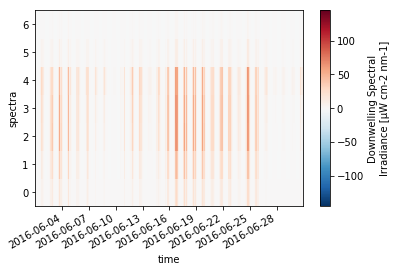

In [10]:
ds['spkir_abj_cspp_downwelling_vector'].T.plot()